In [1]:
import numpy as np                    
import matplotlib.pyplot as plt 
import time, sys   
from mpl_toolkits.mplot3d import Axes3D##nueva librería necesaria para gráficos 3D
from matplotlib import  cm as cm

%matplotlib inline

## Discretizando la derivada parcial

En el espacio 2D, una cuadrícula rectangular (uniforme) se define por los puntos con coordenadas:

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Ahora, definamos $u_{i,j} = u(x_i,y_j)$ y apliquemos las fórmulas de diferencias finitas en cualquiera de las variables $ x, y $ *actuando por separado* en los índices $ i $ y $ j $. Todas las derivadas se basan en la expansión de Taylor 2D de un valor de punto de malla alrededor de $u_{i,j}$.

Por lo tanto, para una derivada parcial de primer orden en la dirección $ x $, una fórmula de diferencias finitas es:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x),$$

y de manera similar en la dirección $ y $. Por lo tanto, podemos escribir fórmulas de diferencia hacia atrás, diferencia hacia adelante o diferencia central en cada uno de las ideas que vamos a desarrollar en adelante.


# Ecuación diferencial de convección lineal.
La EDP que rige la convección lineal 2-D se escribe como

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

Ésta es exactamente la misma forma que con la convección lineal 1-D, excepto que ahora tenemos dos dimensiones espaciales para tener en cuenta a medida que avanzamos en el tiempo.

Nuevamente, el paso de tiempo se discretizará como una diferencia hacia adelante y ambos pasos espaciales se discretizarán como diferencias hacia atrás.

Con eso en mente, nuestra discretización del PDE debería ser relativamente sencilla.

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0.$$

Resolviendo para la variable desconocida tenemos que:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n).$$

Resolveremos esta ecuación con las siguientes condiciones iniciales:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{para} & 0.5 \leq x, y \leq 1 \cr
1\ \text{para} & \text{c.c.}\end{matrix}\end{cases},$$

y condiciones de frontera dadas por:

$$u = 1\ \text{para } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

In [2]:

### declaración de variables
nx = 101
ny = 101
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((nx, ny)) 
un = np.ones((nx, ny)) 

In [3]:
###Asignando condiciones iniciales C-I.

##establecer la función del sombrero C-I. : u(.5<=x<=1 && .5<=y<=1 ) es 2
def funcion_inicial(m = 2):
    u = np.ones((nx, ny))
    u[int(.5 / dx):int(1 / dx + 1),int(.5 / dy):int(1 / dy + 1)] = m 
    return u

###Pintando la condición inicial
##el parámetro figsize se puede utilizar para producir imágenes de diferentes tamaños

def mostrar_3D(u):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')                      
    X, Y = np.meshgrid(x, y)                            
    surf = ax.plot_surface(X, Y, u,cmap=cm.viridis, rstride=1, cstride=1)
    #ax.set_zlim(1,2.1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

# Iterando en dos dimensiones

Para evaluar la onda en dos dimensiones se requiere el uso de varios bucles for anidados para cubrir todas las "i" y las "j". Dado que Python no es un lenguaje compilado, puede haber una notable ralentización en la ejecución del código con múltiples bucles for. Primero intente evaluar el código de convección 2D y vea qué resultados produce.

In [4]:
def ECL_2d(u):
    for n in range(nt + 1): ##recorrer el número de pasos de tiempo
        un = u.copy()
        row, col = u.shape
        for i in range(1, col):
            for j in range(1, row):
                u[i, j] # ¿complete la discretización del problema
                
                u[0, :] 
                u[-1, :]
                u[:, 0] 
                u[:, -1]
    return u

In [5]:
### Mostremos los resultados de iteración
#sol

### Mejorando; operaciones matriciales
##### ------------------------------
Aquí se implementa el mismo código de convección 2D, pero en lugar de utilizar bucles for anidados, se evalúan los mismos cálculos mediante operaciones de matriz.

In [6]:
def ECL_2dspeed(u):
    for n in range(nt + 1): ##recorrer el número de pasos de tiempo
        un = u.copy()
        u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[:-1, 1:])) -
                              (c * dt / dy * (un[1:, 1:] - un[1:, :-1])))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    return u  

In [7]:
### Mostremos los resultados de iteración
#sol

# Aprendiendo el cómo y  el porqué...

La lección en video que lo guía a través de los detalles de lo hecho en este modulo (y en adelante hasta el Paso 8) es **Lección en video 6** en You Tube:

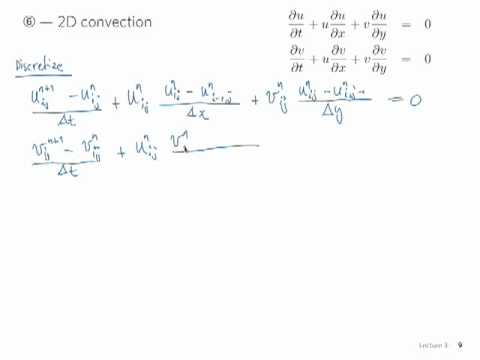

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

## Sistema de ecuaciones de convección no lineales 
Ahora resolvemos la convección 2D, representada por el par de **ecuaciones diferenciales parciales acopladas** a continuación:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizar estas ecuaciones usando los métodos que hemos aplicado anteriormente da como resultado:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Reordenando ambas ecuaciones, resolvemos $ u_ {i, j} ^ {n + 1} $ y $ v_ {i, j} ^ {n + 1} $, respectivamente. Tenga en cuenta que estas ecuaciones también están acopladas.

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

## Condiciones iniciales

Las condiciones iniciales son las mismas que usamos para la convección 1D, aplicadas tanto en la dirección x como en la y.

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{para } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{c.c}
\end{matrix}\end{cases}$$


## Condiciones de frontera
Las condiciones de contorno mantienen u y v iguales a 1 a lo largo de los límites de la cuadrícula

$$u = 1,\ v = 1 \text{ para } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [8]:
def ECnLacoplada(u,v):
    for n in range(nt + 1): ## recorrer el número de pasos de tiempo

        un = u.copy()
        vn = v.copy()
        u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[:-1, 1:])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[1:, :-1]))
        v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[:-1, 1:])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[1:, :-1]))
    
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
    return u, v

In [9]:
# Veamos los resultados de iteración, Juegue con los valores de m, tomando m \in [-1,4]

In [11]:
#mostrar_3D(v)

## Ecuación de Difusión en 2-D


Y aquí está la ecuación de difusión 2D:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

Cuya discretización usando esquema de diferencias finitas es 

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Resolviendo para $u_{i,j}^{n+1}$, obtenemos

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [20]:
###Volviendo a declarar las variables 
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  
un = np.ones((ny, nx))

In [13]:
def ED_2dspeed(u,nt):# función de la ecuación de difusión, tomando diferentes tiempos
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]) +
                        nu * dt / dy**2 * 
                        (un[1: -1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    return u

In [14]:
# Juguemos un poco, para difetentes nt, veamos que pasa
# Para ser par precisos en las observaciones, fije los limites de la gráfica en el eje z

## Ecuación de Burgers en 2-D

Recuerde, la ecuación de Burgers puede generar soluciones discontinuas a partir de una condición inicial que es suave, es decir, puede desarrollar "choques". ¡Queremos ver esto en dos dimensiones ahora!

Aquí está nuestro conjunto acoplado de PDE:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

Conocemos la discretización de cada término, así

$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$


Y ahora, reorganizaremos cada una de estas ecuaciones para la única incógnita: los dos componentes $ u, v $ de la solución en el siguiente paso de tiempo:

$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$
$$
\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

In [15]:
###Jugando con las variables declaradas
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((nx, ny)) 
un = np.ones((nx, ny)) 

In [19]:
def EB_2dspeed(u, v):
    for n in range(nt + 1): 
        un = u.copy()
        vn = v.copy()

        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1,0:-2]) + 
                     nu * dt / dx**2 * 
                     (un[2:,1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2,1:-1]) + 
                     nu * dt / dy**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1,0:-2]))
    
        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[0:-2,1:-1]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[1:-1,0:-2]) + 
                     nu * dt / dx**2 * 
                     (vn[2:,1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2,1:-1]) +
                     nu * dt / dy**2 *
                     (vn[1:-1,2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1,0:-2]))
     
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
    return u, v

In [18]:
# Muestre los resultados obtenidos